In [1]:
import numpy as np
from keras.datasets import mnist #Importing the dataset
import matplotlib.pyplot as plt #For plotting
import cv2 #For capturing images

Using TensorFlow backend.


In [2]:
def drawImg(img,title="Image"): #Making function to display images so we don't have to write again and again
    plt.imshow(img,cmap='gray') 
    plt.axis("off") #Don't want to see axis
    plt.style.use("seaborn") 
    plt.title(title+str(img.shape)) #In the title we will see image name and it's dimensions
    plt.show()

(100, 100)


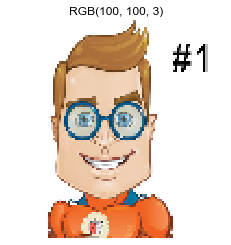

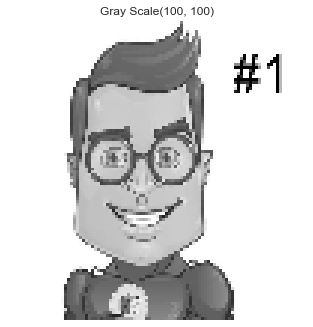

In [3]:
img = cv2.imread("./images/cody2.jpg") #BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
img = cv2.resize(img,(100,100)) #To simplify the image
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting to gray image so we can use 2d filter
print(img_gray.shape) #Two D shape
drawImg(img,"RGB")
drawImg(img_gray,"Gray Scale")


In [4]:
def convolution(img,img_filter): #We imput image and our filter
    W = img.shape[0] #Width taken
    H = img.shape[1] #Height taken
    
    F = img_filter.shape[0] #For filter which is generally square
    new_img = np.zeros((W-F+1,H-F+1)) #Making an activation matrix with given dimensions
    
    for row in range(W-F+1): 
        for col in range(H-F+1):
            #We taken a given cell
            for i in range(F):
                for j in range(F):
                    #Then we traverse from that cell to the distance of filter to compute value of that row and column
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j] 
                if new_img[row][col] > 255:
                    new_img[row][col] = 255 #Value of more than 255 not allowed
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0 #Value of less than 255 not allowed 
                    
    return new_img

In [5]:
blur_filter = np.ones((3,3))/9.0 #Here is the filter which will blur our image
blurred = convolution(img_gray,blur_filter)

edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]]) #This filter will focus on the edges which can be important in recognizing images
edged = convolution(img_gray,edge_filter)


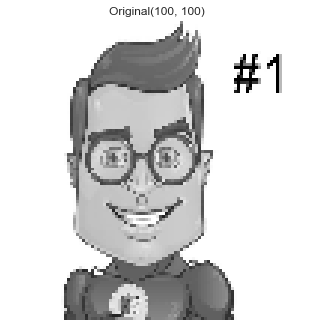

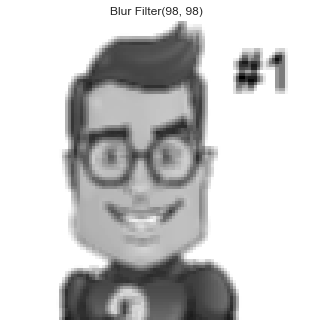

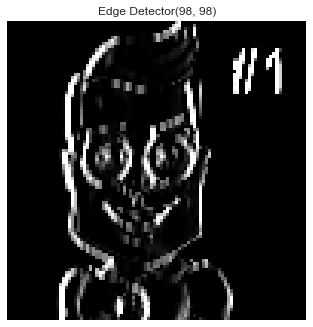

In [6]:
drawImg(img_gray,"Original")
drawImg(blurred,"Blur Filter")
drawImg(edged,"Edge Detector")

(100, 100, 3)


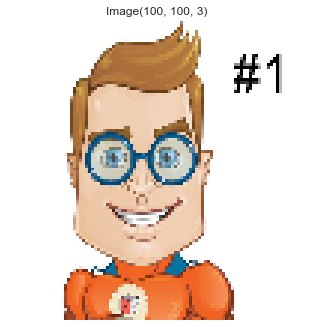

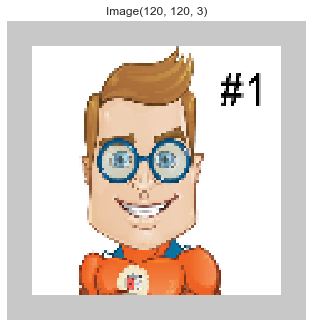

In [7]:
#Padding:
#Due to the filter the size of the activation map is less than real image
#So we add some zeroes to ensure that we have same dimensions
#We have to give value of padding in each dimension and the increase in that dimension is pad*2
print(img.shape)
drawImg(img)

#Padding to this image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200) #200 is the colour notation
drawImg(pad_img)

In [8]:
#Stripes are the length of jumps, it is natural that higher number of stripes will mean lesser number of activation array
#The formula of activated arrays after filter, padding and stripes is 
#Height = (Original Height +2*Padding - Height of filter)/Stripes 
#Width = (Original Width +2*Padding - Width of filter)/Stripes

In [9]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

def pooling(X,mode="max"):
    stride = 2 #Number of jumps
    f = 2 #The size of blank window
    H,W = X.shape #The size of H and W
    
    HO = int((H-f)/stride) + 1 #The height of pooled
    WO = int((W-f)/stride) + 1 #The width of pooled
    
    output = np.zeros((HO,WO)) #Creating a blank output with zero
    
    for r in range(HO): #Will iterate over rows
        for c in range(WO): #Will iterate over columns
            r_start = r*stride #Will be on row of zero index, then 2nd index and so on
            r_end = r_start + f #From start to two more rows
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end] #Will find max in that window
            if mode=="max":
                output[r][c] = np.max(X_slice) #If we want to pool via max, we will take max of window
            else:
                output[r][c] = np.mean(X_slice)
                
    return output #return output

In [10]:

pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
